# SPIGA: Shape Preserving Facial Landmarks with Graph Attention Networks.

[![Code](https://badgen.net/badge/github/spiga/black?a&icon=github&label)](https://github.com/andresprados/SPIGA)
[![Project Page](https://badgen.net/badge/color/Project%20Page/purple?icon=atom&label)](https://bmvc2022.mpi-inf.mpg.de/155/)
[![arXiv](https://img.shields.io/badge/arXiv-2210.07233-b31b1b.svg)](https://arxiv.org/abs/2210.07233)
[![PyPI version](https://badge.fury.io/py/spiga.svg)](https://badge.fury.io/py/spiga)
[![License](https://img.shields.io/badge/License-BSD%203--Clause-blue.svg)](LICENSE)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andresprados/SPIGA/blob/main/colab_tutorials/image_demo.ipynb)

**SPIGA is a face alignment and headpose estimator** that takes advantage of the complementary benefits from CNN and GNN architectures producing plausible face shapes in presence of strong appearance changes. 

## Image Inference Example:
SPIGA provides an inference framework that can be easily deployed 
in third-party projects by adding a few lines of code.


###Setup the repository and load image:

In [41]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

# Load image and bbox
image = cv2.imread("./assets/colab/image_sportsfan.jpg")
with open('./assets/colab/bbox_sportsfan.json') as jsonfile:
    bbox = json.load(jsonfile)['bbox']

### Inference and visualization:

In [42]:
from spiga.inference.config import ModelConfig
from spiga.inference.framework import SPIGAFramework


# Process image
dataset = 'wflw'
# device = 'cpu'
# device = 'mps'
device = 'gpu'

processor = SPIGAFramework(ModelConfig(dataset), device=device)


CUDA is not available, will use CPU
SPIGA model loaded!


In [43]:
features = processor.inference(image, [bbox])

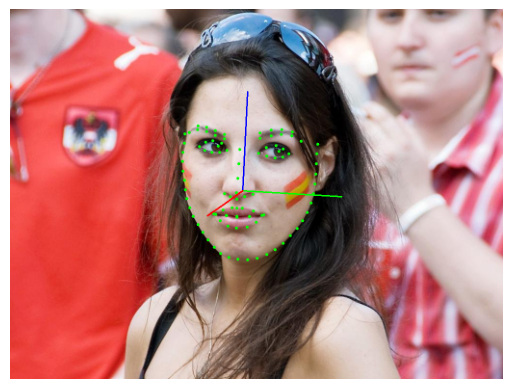

In [44]:
import copy
from spiga.demo.visualize.plotter import Plotter

# Prepare variables
x0,y0,w,h = bbox
canvas = copy.deepcopy(image)
landmarks = np.array(features['landmarks'][0])
headpose = np.array(features['headpose'][0])


# Plot features
plotter = Plotter()
canvas = plotter.landmarks.draw_landmarks(canvas, landmarks)
canvas = plotter.hpose.draw_headpose(canvas, [x0,y0,x0+w,y0+h], headpose[:3], headpose[3:], euler=True)


# Show image results
(h, w) = canvas.shape[:2]
canvas = cv2.resize(canvas, (512, int(h*512/w)))
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Citation
If you like our work dont forget to cite us!

```
@inproceedings{Prados-Torreblanca_2022_BMVC,
  author    = {Andrés  Prados-Torreblanca and José M Buenaposada and Luis Baumela},
  title     = {Shape Preserving Facial Landmarks with Graph Attention Networks},
  booktitle = {33rd British Machine Vision Conference 2022, {BMVC} 2022, London, UK, November 21-24, 2022},
  publisher = {{BMVA} Press},
  year      = {2022},
  url       = {https://bmvc2022.mpi-inf.mpg.de/0155.pdf}
}
```

# Related Notebooks

Tutorials | Notebook |
:---| :---: |
Image Inference Example | [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andresprados/SPIGA/blob/main/colab_tutorials/image_demo.ipynb) |
Face Video Analyzer Demo | [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andresprados/SPIGA/blob/main/colab_tutorials/video_demo.ipynb) |